In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import tensorflow
import keras
from tensorflow.keras.layers import Input, Lambda,Dense,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from glob import glob


#Now resize all the images to this
IMAGE_SIZE = [224,224]

train_path = '/kaggle/input/cars-image-dataset/Cars Dataset/train'
test_path = '/kaggle/input/cars-image-dataset/Cars Dataset/test'

#NOW we import vgg16 library and add some preprocessing layer to the front of vgg
#here we will be using the imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [3]:
for layer in resnet.layers:
    layer.trainable = False
    
#Useful for getting the no of output classes
folders = glob('/kaggle/input/cars-image-dataset/Cars Dataset/train/*')

x = Flatten()(resnet.output)

prediction = Dense(len(folders), activation='softmax')(x)

#Creating a model object
model = Model(inputs=resnet.input, outputs=prediction)

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 24,290,183 (92.66 MB)

 Trainable params: 702,471 (2.68 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [5]:
#telling the model what cost and optimization method must be used
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

#USing the image data generator to impor the images from data
train_datagen = ImageDataGenerator(rescale=1./255,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

#Make sure you provide the same target_size as initialized for the image size
training_set = train_datagen.flow_from_directory('/kaggle/input/cars-image-dataset/Cars Dataset/train',
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode='categorical')



Found 3352 images belonging to 7 classes.


In [6]:
test_set = train_datagen.flow_from_directory('/kaggle/input/cars-image-dataset/Cars Dataset/test',
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode='categorical')

Found 813 images belonging to 7 classes.


In [9]:
warnings.filterwarnings('ignore')

#Now fit the model
r = model.fit(
                    training_set,
                    validation_data=test_set,
                    epochs=5,verbose=1)

Epoch 1/5
105/105 ━━━━━━━━━━━━━━━━━━━━ 341s 3s/step - accuracy: 0.3343 - loss: 2.2180 - val_accuracy: 0.4490 - val_loss: 1.7387
Epoch 2/5
105/105 ━━━━━━━━━━━━━━━━━━━━ 337s 3s/step - accuracy: 0.3770 - loss: 1.9038 - val_accuracy: 0.4736 - val_loss: 1.5993
Epoch 3/5
105/105 ━━━━━━━━━━━━━━━━━━━━ 383s 3s/step - accuracy: 0.4483 - loss: 1.6135 - val_accuracy: 0.4071 - val_loss: 1.8370
Epoch 4/5
105/105 ━━━━━━━━━━━━━━━━━━━━ 381s 3s/step - accuracy: 0.4387 - loss: 1.6727 - val_accuracy: 0.3469 - val_loss: 2.2763
Epoch 5/5
105/105 ━━━━━━━━━━━━━━━━━━━━ 340s 3s/step - accuracy: 0.4235 - loss: 1.9229 - val_accuracy: 0.5277 - val_loss: 1.4102


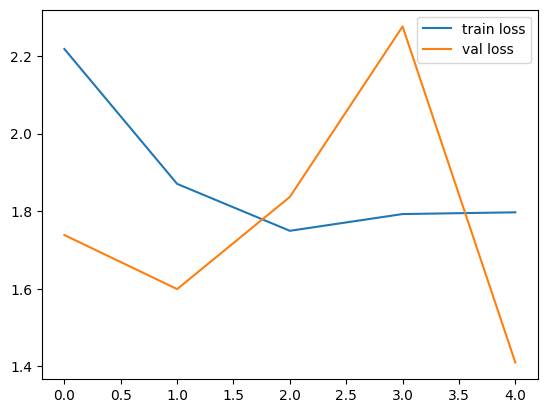

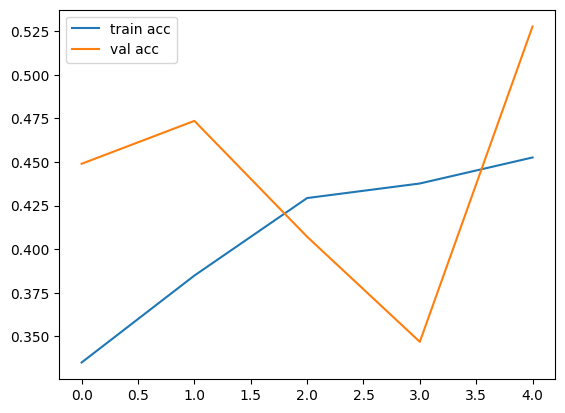

<Figure size 640x480 with 0 Axes>

In [14]:
#Now we will plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

#plotting the accuracy
plt.plot(r.history['accuracy'],label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [11]:
#Saving it as a h5 file
model.save('model_resnet50.h5')

y_pred = model.predict(test_set)
y_pred

26/26 ━━━━━━━━━━━━━━━━━━━━ 70s 3s/step


array([[4.3892753e-01, 1.4131435e-03, 1.8124099e-04, ..., 7.4088946e-02,
        1.0413300e-01, 1.6293266e-01],
       [5.3662146e-03, 4.6982141e-03, 6.2536186e-04, ..., 3.0076727e-02,
        1.0995032e-03, 9.5728552e-01],
       [4.8586032e-01, 2.3977706e-02, 9.6001051e-04, ..., 8.0575988e-02,
        1.4947736e-02, 3.7886578e-01],
       ...,
       [3.0153590e-01, 8.4762340e-03, 2.0084159e-04, ..., 3.0349424e-01,
        2.5024778e-01, 9.0830848e-02],
       [7.9704565e-01, 9.9908863e-04, 5.9320347e-04, ..., 7.0017045e-03,
        2.9425079e-02, 5.4409258e-02],
       [2.2394042e-01, 3.2185970e-03, 3.0219127e-04, ..., 2.6756737e-02,
        1.8617963e-02, 1.0563700e-01]], dtype=float32)

In [26]:
from tensorflow.keras.models import load_model
model = load_model('model_resnet50.h5')

img = image.load_img('/kaggle/input/cars-image-dataset/Cars Dataset/test/Rolls Royce/101.jpg',target_size=(224,224))
x = image.img_to_array(img)
x



array([[[  0.,   0.,   7.],
        [  0.,   0.,   7.],
        [  6.,   5.,  13.],
        ...,
        [197., 207., 219.],
        [226., 231., 235.],
        [222., 227., 231.]],

       [[  3.,   2.,  10.],
        [  4.,   3.,  11.],
        [  8.,   7.,  15.],
        ...,
        [197., 207., 219.],
        [227., 231., 234.],
        [223., 226., 231.]],

       [[  7.,   6.,  14.],
        [  7.,   6.,  14.],
        [  9.,   8.,  16.],
        ...,
        [191., 199., 212.],
        [218., 219., 221.],
        [216., 217., 221.]],

       ...,

       [[ 70.,  70.,  72.],
        [ 70.,  70.,  72.],
        [ 69.,  69.,  71.],
        ...,
        [ 96.,  94.,  95.],
        [ 99.,  95.,  96.],
        [ 99.,  95.,  96.]],

       [[ 71.,  71.,  73.],
        [ 70.,  70.,  72.],
        [ 70.,  70.,  72.],
        ...,
        [ 97.,  95.,  96.],
        [ 97.,  93.,  94.],
        [ 97.,  93.,  94.]],

       [[ 72.,  72.,  74.],
        [ 72.,  72.,  74.],
        [ 71.,  

In [27]:
x.shape

(224, 224, 3)

In [28]:
x = x/255

In [29]:
x = np.expand_dims(x,axis=0)
img_data = preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [30]:
model.predict(img_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


array([[4.2413681e-09, 2.5190657e-05, 6.3678290e-04, 3.5042764e-11,
        1.2678288e-08, 2.0892621e-06, 9.9933594e-01]], dtype=float32)

In [31]:
a = np.argmax(model.predict(img_data),axis=1)
a==1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


array([False])